Artigo 01: Tijolo Cerâmico ou Tijolo de Concreto?

Passo 01: Conssite em instalar as dependências necessárias para a execução do notebook.

In [54]:
!pip install -Uqq duckduckgo_search
!pip install -Uqq fastai
!pip install tqdm

Passo 02: Importação das bibliotecas necessárias.

In [55]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from tqdm import tqdm_notebook

Passo 03: Determinação da quantidade de imagens a serem buscadas na web.

In [56]:
def search_images(term, max_images=400): return L(ddg_images(term, max_results=max_images)).itemgot('image')

Passo 04.1: Teste para verificar se a busca retorna o desejado.

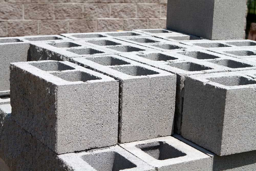

In [57]:
urls = search_images('tijolo concreto', max_images=1)
urls[0]

dest = 'tijoloConcreto.jpg'
download_url(urls[0], dest, show_progress=True)


im = Image.open(dest)
im.to_thumb(256,256)

Passo 04.2: Teste para verificar se a busca retorna o desejado.

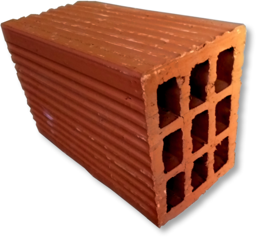

In [58]:
urls = search_images('tijolo', max_images=1)
urls[0]

dest = 'tijolo.jpg'
download_url(urls[0], dest, show_progress=True)


im = Image.open(dest)
im.to_thumb(256,256)

Passo 05: Criar os diretórios onde serão salvas as imagens baixadas de acordo com a string de busca. O uso do tqdm serve para ter noçãos do progresso da operação.

In [59]:
searches = 'tijolo','tijolo concreto'
path = Path('ceramico_ou_concreto')
from time import sleep

for o in tqdm_notebook(searches):
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} foto'))
    sleep(2)
    download_images(dest, urls=search_images(f'{o} parede'))
    sleep(2)
    download_images(dest, urls=search_images(f'{o} milheiro'))
    sleep(2)
    resize_images(path/o, max_size=400, dest=path/o)

<ipython-input-59-93972d6b286e>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for o in tqdm_notebook(searches):


  0%|          | 0/2 [00:00<?, ?it/s]

Passo 06: Verificação de quantidade de falhas de download.

In [60]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

34

Passo 07: Criação do DataBlock com modelos não utilizados no treinamento.

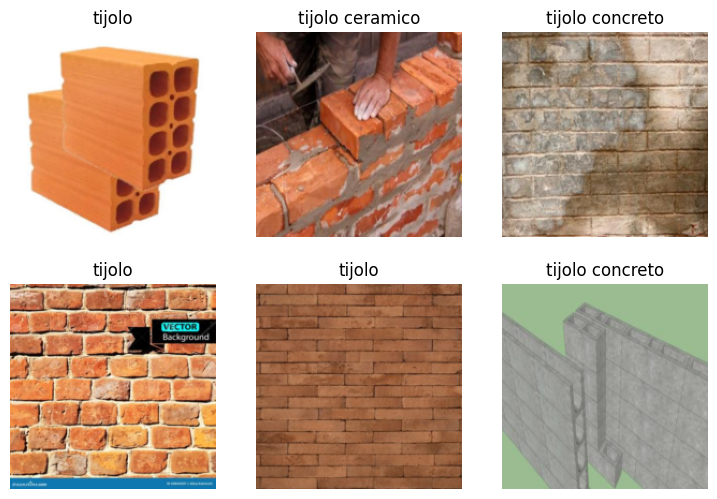

In [61]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Passo 08: Treinamento do modelo.

In [62]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.382362,0.841194,0.282609,04:51


epoch,train_loss,valid_loss,error_rate,time
0,1.019271,0.697586,0.241107,07:16
1,0.810152,0.599152,0.199605,07:21
2,0.609869,0.576316,0.209486,07:19


Passo 09.1: Teste do modelo com um tijolo de concreto dizendo se é ou não cerâmico.

In [63]:
eh_concreto,_,probs = learn.predict(PILImage.create('tijoloConcreto.jpg'))
print(f"This is a: {eh_concreto}.")
print(f"Probability it's a ceramic: {probs[0]:.4f}")


This is a: tijolo concreto.
Probability it's a ceramic: 0.0229


Passo 09.2: Teste do modelo com um tijolo cerâmico dizendo se é ou não cerâmico.

In [64]:
eh_ceramico,_,probs = learn.predict(PILImage.create('tijolo.jpg'))
print(f"This is a: {eh_ceramico}.")
print(f"Probability it's a ceramic: {probs[0]:.4f}")

This is a: tijolo.
Probability it's a ceramic: 0.5836
